In [1]:
# Import relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import data
X_train = pd.read_csv("Pima/X_train.csv") 
X_test = pd.read_csv("Pima/X_test.csv")
y_train = pd.read_csv("Pima/y_train.csv")
y_test = pd.read_csv("Pima/y_test.csv")

# Delete columns containing the original indices
del X_train["Unnamed: 0"] 
del X_test["Unnamed: 0"] 
del y_train["Unnamed: 0"] 
del y_test["Unnamed: 0"] 

# Rename columns
y_train.columns = ["Label"]
y_test.columns = ["Label"]

# Inspect data
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8
0,8,194,80,0,0,26.1,0.551,67
1,1,118,58,36,94,33.3,0.261,23
2,2,142,82,18,64,24.7,0.761,21
3,3,103,72,30,152,27.6,0.730,27
4,5,147,75,0,0,29.9,0.434,28


In [3]:
# Check for missing values
print(X_train.isna().sum().sum())
print(X_test.isna().sum().sum())
print(y_train.isna().sum().sum())
print(y_test.isna().sum().sum())

0
0
0
0


In [4]:
# Change to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train["Label"])
y_test = np.array(y_test["Label"])

In [5]:
# Scale the design matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train) # Must not use test data to determine the scaling
X_test = scaler.transform(X_test)

# This scaler uses a biased estimator for the standard deviation, equivalent to numpy.std(x, ddof=0)
# Therefore, this scaling is identical to that in the notes

In [6]:
# Implement logistic regression without regularisation
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(penalty="none", max_iter=1000, solver='lbfgs') # lbfgs and saga give the same results
log.fit(X_train, y_train)
y_pred_train = log.predict(X_train)
y_pred_test = log.predict(X_test)

In [7]:
# Calculate empirical risk using zero-one loss
from sklearn.metrics import zero_one_loss

zero_one_train = zero_one_loss(y_train, y_pred_train, normalize=True) # On training data
zero_one_test = zero_one_loss(y_test, y_pred_test, normalize=True) # On test data
print(f"The empirical risk on the training data is {zero_one_train:.4f}")
print(f"The empirical risk on the test data is {zero_one_test:.4f}")

The empirical risk on the training data is 0.2182
The empirical risk on the test data is 0.2338


In [8]:
# Calculate empirical risk using logistic loss
from sklearn.metrics import log_loss

logistic_train = log_loss(y_train, log.predict_proba(X_train), normalize=True) # On training data
logistic_test = log_loss(y_test, log.predict_proba(X_test), normalize=True) # On test data
print(f"The empirical risk on the training data is {logistic_train:.4f}")
print(f"The empirical risk on the training data is {logistic_test:.4f}")

The empirical risk on the training data is 0.4758
The empirical risk on the training data is 0.4579


In [9]:
# Implement logistic regression with regularisation

# Use different regularisation strengths
lambda_list = np.linspace(0.001, 0.25, 100)
np.insert(lambda_list, 0, 10^-20) # Add in lambda = 0 (but not exactly zero, or C will be undefined)

# Create arrays to store results
risk_train_ridge = []
risk_test_ridge = []
risk_train_lasso = []
risk_test_lasso = []

n = len(X_train)

# Iterate through lambda values
for l in lambda_list:
    
    # Ridge penalty
    log_ridge = LogisticRegression(penalty="l2", C=1/(2*l*n), solver='lbfgs' 
                                   , max_iter=1000, random_state=2083836)
    log_ridge.fit(X_train, y_train)
    risk_train_ridge.append(log_loss(y_train, log_ridge.predict_proba(X_train), normalize=True))
    risk_test_ridge.append(log_loss(y_test, log_ridge.predict_proba(X_test), normalize=True))
    
    # Lasso penalty
    log_lasso = LogisticRegression(penalty="l1", C=1/(l*n), solver="saga", 
                                   max_iter=1000, random_state=2083836) # saga supports lasso
    log_lasso.fit(X_train, y_train)
    risk_train_lasso.append(log_loss(y_train, log_lasso.predict_proba(X_train), normalize=True))
    risk_test_lasso.append(log_loss(y_test, log_lasso.predict_proba(X_test), normalize=True))

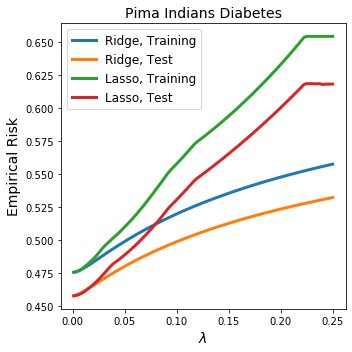

In [10]:
# Plot graphs to visualise effect of lambda on empirical risk
plt.figure(figsize=(5, 5))
plt.plot(lambda_list, risk_train_ridge, label="Ridge, Training", lw=3)
plt.plot(lambda_list, risk_test_ridge, label="Ridge, Test", lw=3)
plt.plot(lambda_list, risk_train_lasso, label="Lasso, Training", lw=3)
plt.plot(lambda_list, risk_test_lasso, label="Lasso, Test", lw=3)
plt.xlabel("$\lambda$", fontsize=14)
plt.ylabel("Empirical Risk", fontsize=14)
plt.legend(fontsize=12, loc="upper left")
plt.title("Pima Indians Diabetes", fontsize=14)
plt.tight_layout()
plt.savefig("pima-logistic.png")
plt.show()

In [11]:
# Verify method
X_train_verify = pd.read_csv("Pima/X_train_verify.csv") 
X_test_verify = pd.read_csv("Pima/X_test_verify.csv")
y_train_verify = pd.read_csv("Pima/y_train_verify.csv")
y_test_verify = pd.read_csv("Pima/y_test_verify.csv")

del X_train_verify["Unnamed: 0"] 
del X_test_verify["Unnamed: 0"] 
del y_train_verify["Unnamed: 0"] 
del y_test_verify["Unnamed: 0"] 

y_train_verify.columns = ["Label"]
y_test_verify.columns = ["Label"]
     
        
X_train_verify = np.array(X_train_verify)
X_test_verify = np.array(X_test_verify)
y_train_verify = np.array(y_train_verify["Label"])
y_test_verify = np.array(y_test_verify["Label"])

scaler = StandardScaler(with_mean=False)
X_train_verify = scaler.fit_transform(X_train_verify) # Must not use test data to determine the scaling
X_test_verify = scaler.transform(X_test_verify) 

log_verify = LogisticRegression(penalty="l2", C=1/(2*0.05*len(X_train_verify)), 
                                max_iter=1000, solver='lbfgs', random_state=2083836)
log_verify.fit(X_train_verify, y_train_verify)
print(zero_one_loss(y_test_verify, log_verify.predict(X_test_verify), normalize=True))
print(log_loss(y_test_verify, log_verify.predict_proba(X_test_verify), normalize=True))

log_verify2 = LogisticRegression(penalty="l1", C=1/(0.1*len(X_train_verify)), max_iter=3000, 
                                 solver="saga", random_state=2083836)
log_verify2.fit(X_train_verify, y_train_verify)
print(zero_one_loss(y_test_verify, log_verify2.predict(X_test_verify), normalize=True))
print(log_loss(y_test_verify, log_verify2.predict_proba(X_test_verify), normalize=True))

# Sklearn's implementation of zero-one loss is the same as the supplied function
# Zero-one loss is correct to 7 decimal points; implies ridge and lasso are correct

# For ridge and lasso, logistic loss is correct to 5 and 3 decimal points respectively

0.2142857142857143
0.4874525766236942
0.2597402597402597
0.5614427592547805
